## EDA and some data cleaning

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_csv("data/movie_raw.csv", index_col=0)
df.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NaN,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


1. Find the number of movies that were released in theatres each year.

• There are some erroneous values in the data

• Visualize the number of movies each year and describe what you see

• Explain what assumptions and fixes you plan to make in the data as you move forward with your analysis

In-theaters years: [1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029.
 2030. 2031. 2032. 2033. 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041.
 2042. 2043. 2044. 2045. 2046. 2047. 2048. 2049. 2050. 2051. 2052. 2053.
 2054. 2055. 2056. 2057. 2058. 2059. 2060. 2061. 2062. 2063. 2064. 2065.
 2066. 2067. 2068. 2069.   nan]

On-streaming years: [1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2035.   nan]


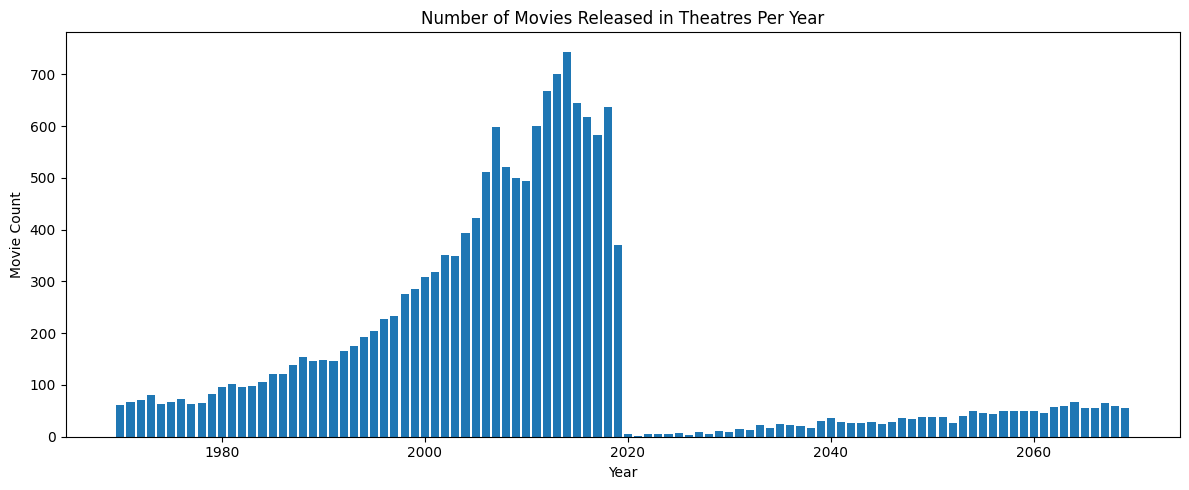

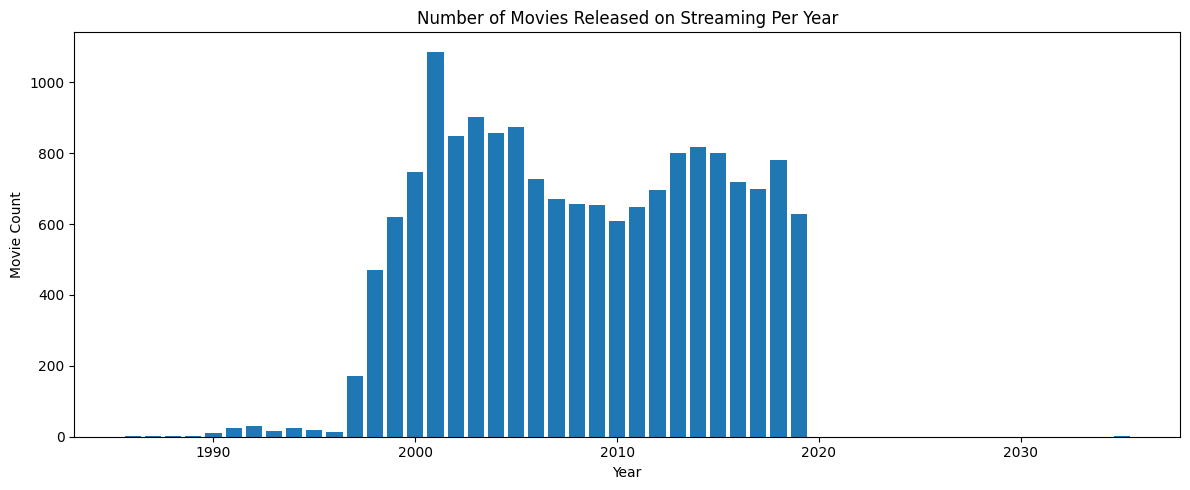

In [25]:
# ensure datetime format
df["in_theaters_date"] = pd.to_datetime(df["in_theaters_date"], errors="coerce")
df["on_streaming_date"] = pd.to_datetime(df["on_streaming_date"], errors="coerce")

# group by year
in_theaters_year = (
    df.groupby(df["in_theaters_date"].dt.year)
      .size()
      .reset_index(name="count_in_theaters")
      .rename(columns={"in_theaters_date": "year"})
)

on_streaming_year = (
    df.groupby(df["on_streaming_date"].dt.year)
      .size()
      .reset_index(name="count_on_streaming")
      .rename(columns={"on_streaming_date": "year"})
)

print("In-theaters years:", df["in_theaters_date"].dt.year.sort_values().unique())
print("\nOn-streaming years:", df["on_streaming_date"].dt.year.sort_values().unique())

# plot in_theaters_date
plt.figure(figsize=(12, 5))
plt.bar(in_theaters_year["year"], in_theaters_year["count_in_theaters"])
plt.title("Number of Movies Released in Theatres Per Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.tight_layout()
plt.show()

# plot on_streaming_year
plt.figure(figsize=(12, 5))
plt.bar(on_streaming_year["year"], on_streaming_year["count_on_streaming"])
plt.title("Number of Movies Released on Streaming Per Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.tight_layout()
plt.show()

I observe a steady increase in the number of movies released each year from 1970 through 2017. Releases stabilize around 500–700 films in 2018 and 2019. Movies with in_theater_date or on_streaming_date in or after 2020 are unusually few, which suggests that many of these dates may be misrecorded. For instance, 12 Angry Men (Twelve Angry Men) was released in 1957, but its in_theaters_date is recorded as 2057, which is in the future. To correct this issue, I will adjust any dates beyond 2020 by subtracting 100 years in both columns.

In [26]:
# define cutoff year
cutoff_year = 2020

# fix in_theaters_date
df.loc[df["in_theaters_date"].dt.year >= cutoff_year, "in_theaters_date"] = \
    df["in_theaters_date"] - pd.DateOffset(years=100)

# fix on_streaming_date
df.loc[df["on_streaming_date"].dt.year >= cutoff_year, "on_streaming_date"] = \
    df["on_streaming_date"] - pd.DateOffset(years=100)

# save the clean dataset to CSV
df.to_csv("data/movie_processed.csv")

2. Looking only at movies that were released in theatres before 2010:

• Find the 5 highest rated movies by critics (critic_rating)

• Find the 5 highest rated movies by the general audience (audience_rating)

• Take a look at the movie titles – these top movies don’t seem very popular

In [27]:
df_pre2010 = df[df["in_theaters_date"].dt.year < 2010]

# Top 5 highest critic-rated movies
top5_critic = (
    df_pre2010
    .sort_values(by="critic_rating", ascending=False)
    .head(5)
)

print("Top 5 critic-rated movies before 2010:")
print(top5_critic[["movie_title", "critic_rating"]])

# Top 5 highest audience-rated movies
top5_audience = (
    df_pre2010
    .sort_values(by="audience_rating", ascending=False)
    .head(5)
)

print("\nTop 5 audience-rated movies before 2010:")
print(top5_audience[["movie_title", "audience_rating"]])

Top 5 critic-rated movies before 2010:
                                  movie_title  critic_rating
14217  The Great Silence (Il grande silenzio)            100
3063                           The Band Wagon            100
534                         The Invisible Man            100
10164                        Multiple Maniacs            100
6031       Father (Father: Diary of One Week)            100

Top 5 audience-rated movies before 2010:
                movie_title  audience_rating
1846             Ice People            100.0
222         Prima Ballerina            100.0
3229  Been Rich All My Life            100.0
1283   La Ciudad (The City)            100.0
6747          The Godfather             98.0


3. Create a new DataFrame containing only “popular” movies that were released in theatres before 2010.

• Assume popular movies are those with more audience reviews than the average number of audience reviews of all movies before 2010

• Find the 5 highest rated movies by critics (critic_rating)

• Find the 5 highest rated movies by the general audience (audience_rating)

• Take a look at the movie titles – these top movies should make more sense

In [28]:
df_pre2010 = df[df["in_theaters_date"].dt.year < 2010].copy() # filter pre2010 movies

avg_audience_reviews = df_pre2010["audience_count"].mean() # threshold
df_pre2010_popular = df_pre2010[df_pre2010["audience_count"] > avg_audience_reviews].copy() # filter pre2010 popular movies

# Top 5 highest rated by critics
top5_critic_popular = (
    df_pre2010_popular.sort_values("critic_rating", ascending=False)
        .head(5)
)

print("Top 5 critic-rated popular movies (pre-2010):")
print(top5_critic_popular[["movie_title", "critic_rating", "audience_count"]])

# Top 5 highest rated by audience
top5_audience_popular = (
    df_pre2010_popular.sort_values("audience_rating", ascending=False)
        .head(5)
)

print("\nTop 5 audience-rated popular movies (pre-2010):")
print(top5_audience_popular[["movie_title", "audience_rating", "audience_count"]])

Top 5 critic-rated popular movies (pre-2010):
          movie_title  critic_rating  audience_count
11227       Pinocchio            100        279248.0
15440     Toy Story 2            100        999952.0
13557  The Terminator            100        775856.0
9636     Mary Poppins            100        682310.0
15439       Toy Story            100       1109209.0

Top 5 audience-rated popular movies (pre-2010):
                                          movie_title  audience_rating  \
6747                                    The Godfather             98.0   
12463                        The Shawshank Redemption             98.0   
851                                        GoodFellas             97.0   
6748                           The Godfather, Part II             97.0   
5706   Star Wars: Episode V - The Empire Strikes Back             97.0   

       audience_count  
6747         732931.0  
12463        885508.0  
851          428871.0  
6748         410868.0  
5706        1055106.0 

4. Using your new DataFrame (popular movies released in theatres before 2010), answer the following questions about the rating column:

• What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?

• Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?

Percentage of movies by rating:
rating
PG-13    41.58
R        32.36
PG       19.64
G         6.41
Name: proportion, dtype: float64


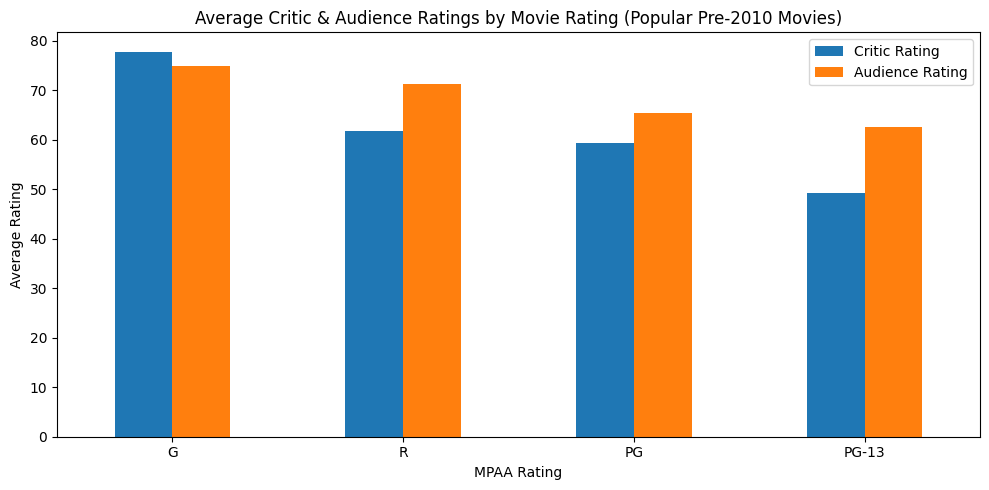

In [29]:
# percentage of movies by rating
rating_percent = round((
    df_pre2010_popular["rating"]
    .value_counts(normalize=True) * 100
), 2)

print("Percentage of movies by rating:")
print(rating_percent)

# compute averages
avg_ratings = (
    df_pre2010_popular
    .groupby("rating")[["critic_rating", "audience_rating"]]
    .mean()
    .sort_values("critic_rating", ascending=False)
)

# plot
avg_ratings.plot(kind="bar", figsize=(10, 5))
plt.title("Average Critic & Audience Ratings by Movie Rating (Popular Pre-2010 Movies)")
plt.xlabel("MPAA Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.legend(["Critic Rating", "Audience Rating"])
plt.tight_layout()
plt.show()

Some key takeaways are:
- G-rated movies have the highest average ratings from both critics and audiences, which suggests a broad appeal and strong overall quality among popular pre-2010 releases.
- R-rated and PG movies show a noticeable gap where audiences rate them higher than critics, indicating these films may resonate more with viewers than reviewers.
- PG-13 movies receive the lowest critic ratings, implying that among popular films, PG-13 titles tend to be less appreciated compared to other MPAA categories.

5. Create a pair plot of the new DataFrame. What are 3 insights you can take away from looking at the pair plot?

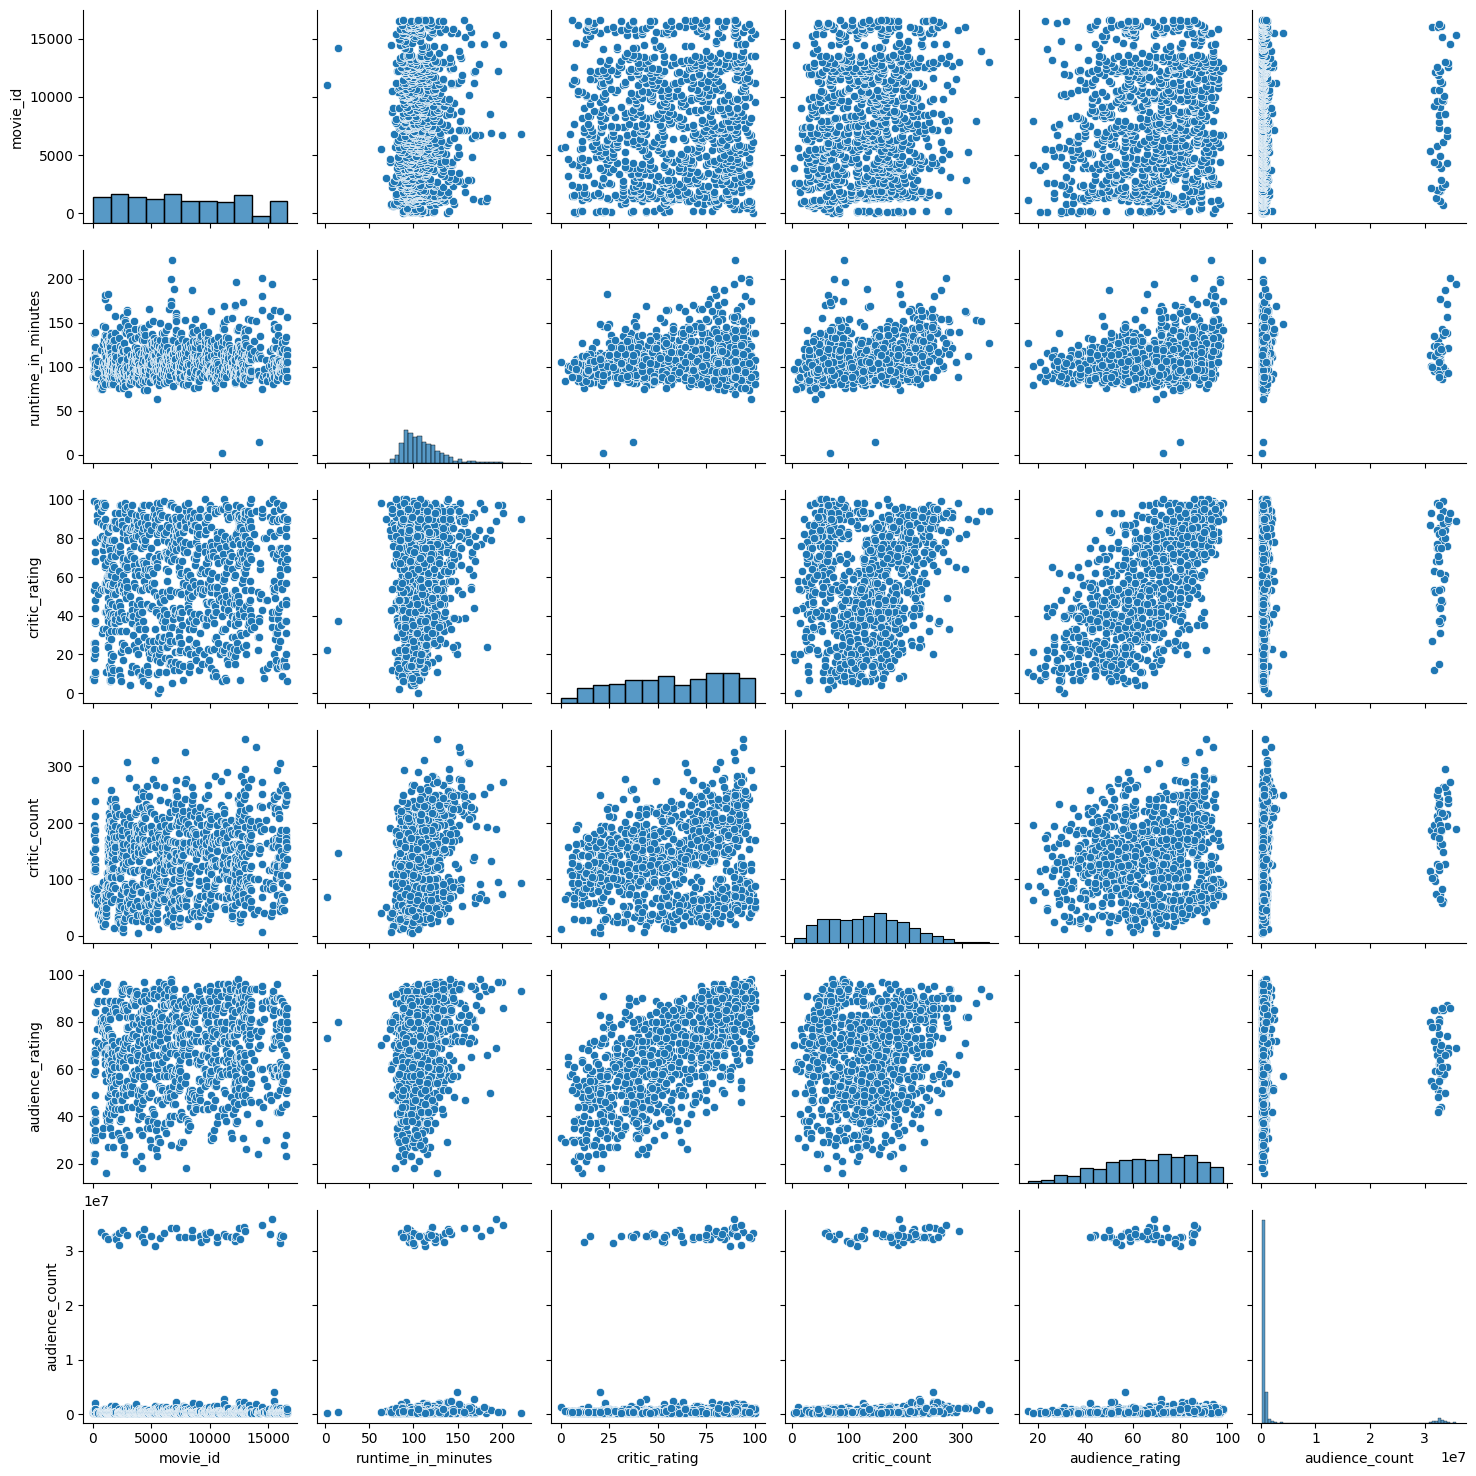

In [30]:
numeric_cols = df_pre2010_popular.select_dtypes(include=["number"]) # filter the numerical columns

sns.pairplot(numeric_cols, diag_kind="hist")
plt.show()

Some key insights are:
- There appears to be a positive relationship between critic ratings and audience ratings, suggesting that movies liked by critics are usually also liked by audiences.
- Critic count increases with critic rating, suggesting higher-rated movies attract more critics to review.
- Runtime shows little correlation with either rating metric, meaning longer movies are not necessarily rated higher or lower.

6. Using either pandas or data visualizations, find 3 more insights using any columns in the new DataFrame.

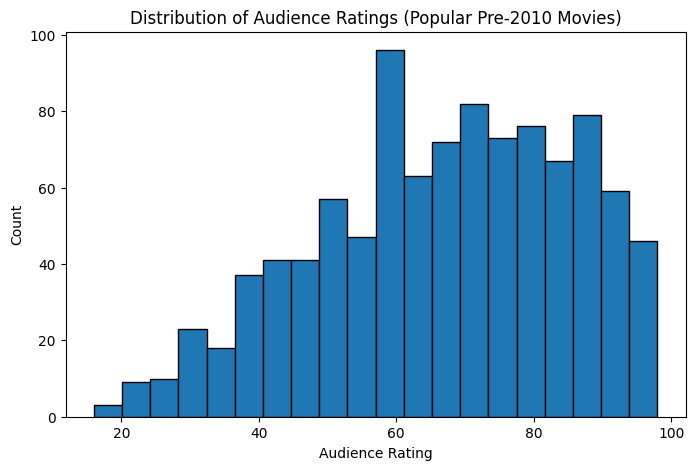

In [31]:
# Insight 1: distribution of audience ratings

plt.figure(figsize=(8, 5))
plt.hist(df_pre2010_popular["audience_rating"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Audience Ratings (Popular Pre-2010 Movies)")
plt.xlabel("Audience Rating")
plt.ylabel("Count")
plt.show()

The audience rating distribution is skewed toward higher values. Very few films fall below 40, suggesting that movies with extremely low audience reception are unlikely to become “popular” by the definition used in this dataset. Overall, audience sentiment skews generally positive for these films.

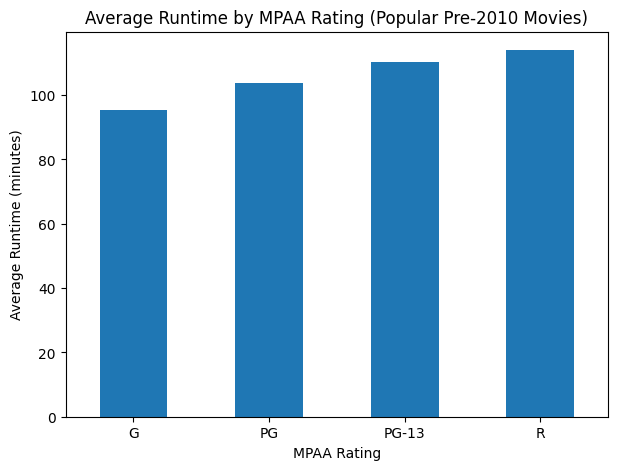

In [32]:
# Insight 2: average runtime by MPAA ratings

avg_runtime = df_pre2010_popular.groupby("rating")["runtime_in_minutes"].mean()

plt.figure(figsize=(7,5))
avg_runtime.plot(kind="bar")
plt.title("Average Runtime by MPAA Rating (Popular Pre-2010 Movies)")
plt.xlabel("MPAA Rating")
plt.ylabel("Average Runtime (minutes)")
plt.xticks(rotation=0)
plt.show()

Average runtime increases consistently as MPAA rating becomes more restrictive. This pattern reflects audience targeting: films for younger audiences tend to be shorter, while R-rated movies often involve more complex stories or genres that require longer runtimes.

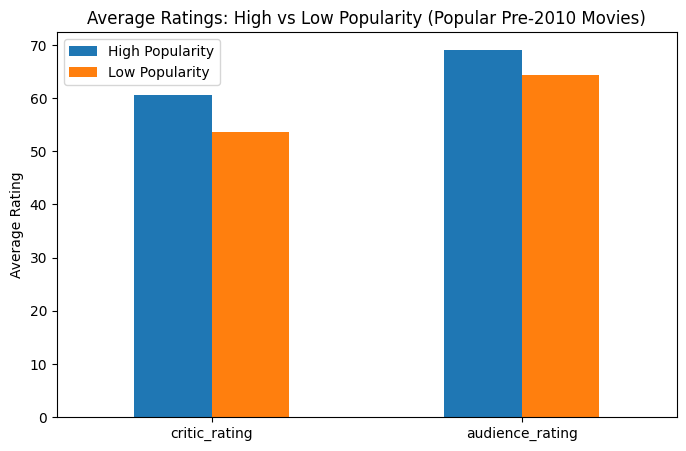

In [33]:
# Insight 3: do more popular movies have higher ratings?

# split popular movies into two groups by audience_count
median_reviews = df_pre2010_popular["audience_count"].median()

high_pop = df_pre2010_popular[df_pre2010_popular["audience_count"] > median_reviews]
low_pop  = df_pre2010_popular[df_pre2010_popular["audience_count"] <= median_reviews]

# compute average critic ratings and audience ratings
ratings_compare = pd.DataFrame({
    "High Popularity": high_pop[["critic_rating", "audience_rating"]].mean(),
    "Low Popularity": low_pop[["critic_rating", "audience_rating"]].mean()
})

# plot
ratings_compare.plot(kind="bar", figsize=(8,5))
plt.title("Average Ratings: High vs Low Popularity (Popular Pre-2010 Movies)")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

Movies with above-median audience counts (“high popularity”) have noticeably higher critic and audience ratings than less popular films. This suggests that films attracting more audience engagement tend to be better received overall. 